In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Example Data
A challenging problem confronting water pollution and control is related to the tanning industry.  Tannery wastes are chemically complex, characterized by high values of chemical oxygen demand, volatile solids and other pollution measures.  The data below was obtained from 33 samples of chemically treated wastes collected by Virginia Polytechnic Institute and and State University.  The data are percent reduction in total solids (the independent variable) and chemical oxygen demand (the dependent variable).

In [4]:
solids = np.array([3.,7.,11.,15.,18.,27.,29.,30.,30.,31.,31.,32.,33.,33.,34.,36.,36.,36.,
                   37.,38.,39.,39.,39.,40.,41.,42.,42.,43.,44.,45.,46.,47.,50.])
cod = np.array([5.,11.,21.,16.,16.,28.,27.,25.,35.,30.,40.,32.,34.,32.,34.,37.,38.,34.,
                36.,38.,37.,36.,45.,39.,41.,40.,44.,37.,44.,46.,46.,49.,51.])

Text(0,0.5,'COD [%]')

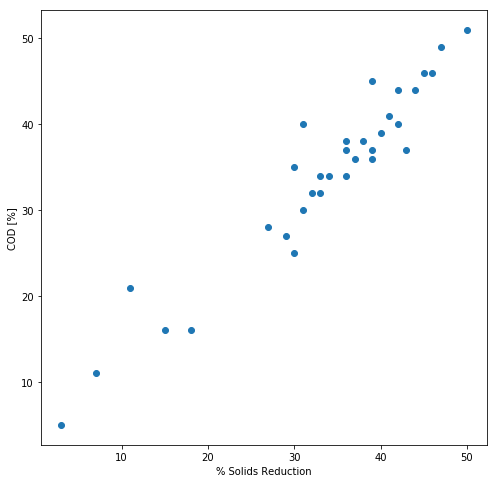

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(solids, cod, 'o')
ax.set_xlabel('% Solids Reduction')
ax.set_ylabel('COD [%]')

In [39]:
def predict(x, b, a):
    
    return a + b*x

def my_linregress(x, y, b0=0.):
    
    n = x.size
    
    xanom = x - x.mean()
    yanom = y - y.mean()
    
    sxx = (xanom**2).sum()
    syy = (yanom**2).sum()
    sxy = (yanom*xanom).sum()
    
    b = sxy / sxx             # Slope 
    a = y.mean() - x.mean()*b # Intercept
    
    df = n-2
    s2 = (syy - b*sxy)/df
    r = sxy / (sxx*syy)**0.5
    t = (b-b0) / np.sqrt(s2/sxx)
    
    p = scipy.stats.t.sf(t, df)
    
    return (slope, intercept, r, t, p)

In [40]:
my_linregress(solids, cod)

(0.9036432105793232,
 3.8296331975887057,
 0.9554793566657455,
 18.029962435529033,
 2.737706107412002e-18)